In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

%matplotlib inline

In [67]:
df = pd.read_excel('Raw_data.xlsx', sheet_name = 'CustomerDemographic')
df.head()

C:\Users\Vicky Ram\AppData\Local\Temp\ipykernel_18080\1818430575.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel('Raw_data.xlsx', sheet_name = 'CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [68]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [69]:
#the column named default looks invalid so drop it
df.drop(columns=['default'], inplace = True)

In [70]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [71]:
df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [72]:
# percentage of the missing values of each columns
df.isna().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

## Working on the missing values

In [73]:
# first name is present . so we can replace the nan value of last name with 
df[df['last_name'].isna()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27,NaN,NaN,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17,NaN,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [74]:
df['last_name'].fillna('None', inplace = True, axis = 0)

In [75]:
df['last_name'].isna().sum()

0

In [76]:
df[df['DOB'].isna()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN


In [77]:
#DOB missing percentage is less than 5%. so we remove it
index_pop = df[df['DOB'].isna()].index
index_pop

Int64Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,
             581,  598,  679,  684,  798,  838,  882,  891,  949,  974,  982,
             995, 1037, 1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582,
            1627, 1682, 1739, 1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020,
            2068, 2164, 2204, 2251, 2294, 2334, 2340, 2413, 2425, 2468, 2539,
            2641, 2646, 2695, 2696, 2853, 2919, 2962, 2998, 3011, 3085, 3150,
            3221, 3222, 3254, 3287, 3297, 3311, 3321, 3342, 3364, 3472, 3509,
            3512, 3564, 3653, 3717, 3726, 3778, 3882, 3930, 3934, 3997],
           dtype='int64')

In [78]:
df.drop(index= index_pop, inplace = True, axis = 0)

In [79]:
df['DOB'].isna().sum()

0

In [80]:
df['job_title'].fillna('Missing', inplace = True, axis = 0)

In [81]:
df['job_title'].isna().sum()

0

In [82]:
df['job_industry_category'].fillna('Missing', inplace = True, axis = 0)

In [83]:
df['job_industry_category'].isna().sum()

0

## Create a age column

In [84]:
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df['Age'] = df['DOB'].apply(age)

In [85]:
df['Age'].describe()

count    3913.000000
mean       46.146179
std        12.797926
min        21.000000
25%        37.000000
50%        46.000000
75%        56.000000
max       180.000000
Name: Age, dtype: float64

C:\Users\Vicky Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age'>

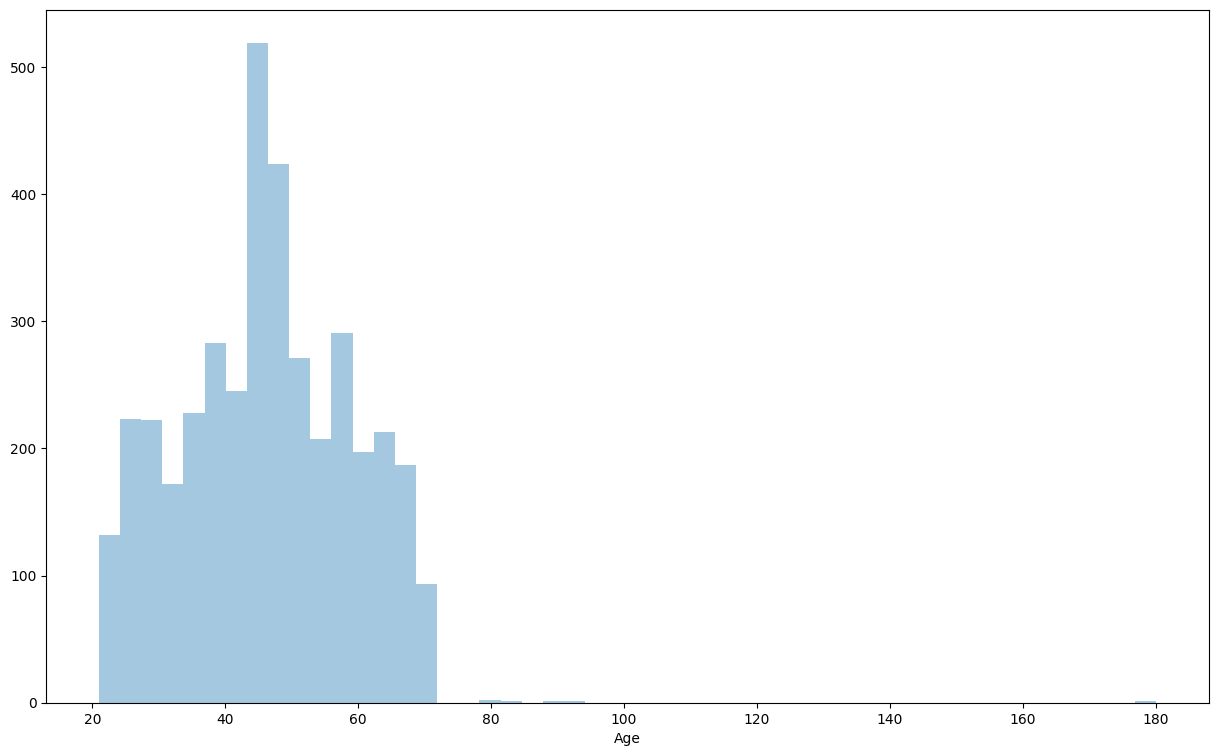

In [86]:
plt.figure(figsize=(15,9))
sns.distplot(df['Age'], kde=False, bins = 50)

In [87]:
#Grouping the age group
import math
df['Age_Group'] = df['Age'].apply(lambda x: (math.floor(x/10)+1)*10)

In [88]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_Group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70,80
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43,50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70,80
3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,62,70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46,50


C:\Users\Vicky Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age_Group'>

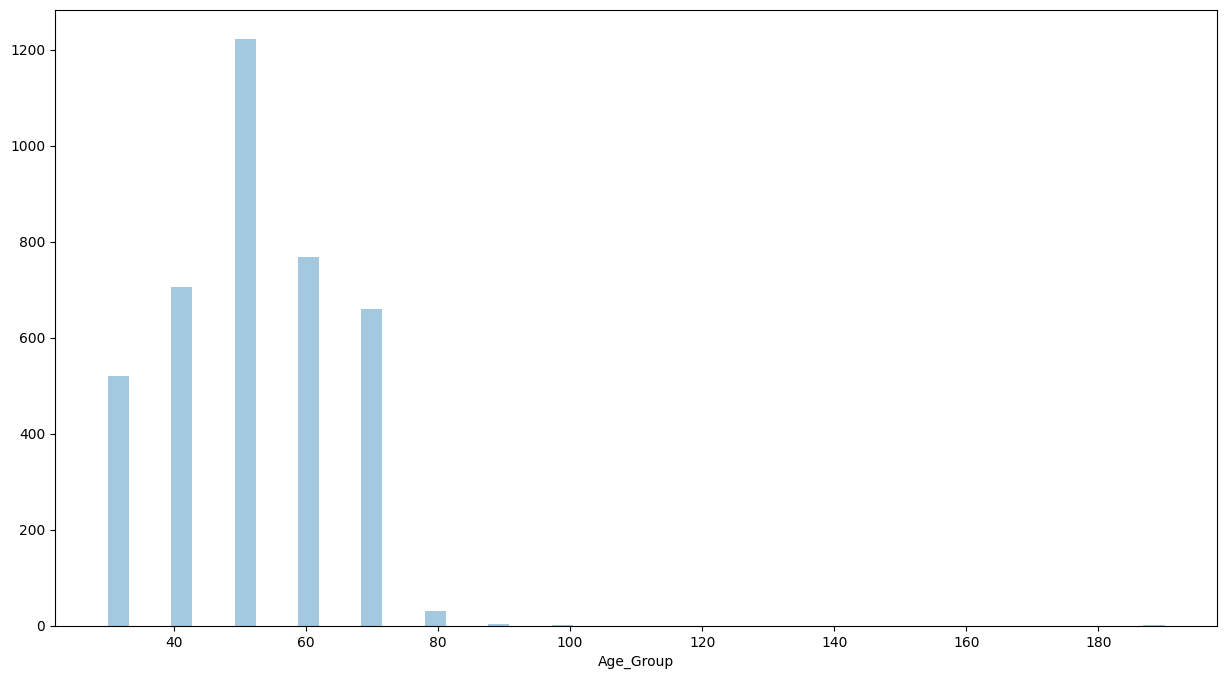

In [91]:
plt.figure(figsize=(15,8))
sns.distplot(df['Age_Group'], kde= False, bins= 50)

In [94]:
df[df['Age'] >100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_Group
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,180,190


In [95]:
age_index_drop = df[df['Age'] >100].index

df.drop(index=age_index_drop, inplace=True , axis=0)

In [97]:
#filling the missing values of other columns
df['job_title'].fillna('Missing', inplace=True, axis=0)

In [98]:
df['job_industry_category'].fillna('Missing', inplace=True, axis=0)

## Data Inconsistency

In [100]:
df['gender'].value_counts()

Female    2037
Male      1872
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [102]:
def replace(genders):
    if genders == "F":
        return "Female"
    elif genders == "Femal":
        return "Female"
    elif genders == "M":
        return "Male"
    else:
        return genders
df['gender'] = df['gender'].apply(replace)

In [103]:
df['gender'].value_counts()

Female    2039
Male      1873
Name: gender, dtype: int64

In [104]:
df['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: wealth_segment, dtype: int64

In [105]:
df['deceased_indicator'].value_counts()

N    3910
Y       2
Name: deceased_indicator, dtype: int64

In [106]:
df['owns_car'].value_counts()

Yes    1974
No     1938
Name: owns_car, dtype: int64

In [108]:
cust_demo_dedupped = df.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(df.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3912
Number of records in original dataset : 3912


## Export the cleaned data into a CSV

In [109]:
df.to_csv('CustomerDemographic_Cleaned.csv', index=False)